<center>
<a href="http://keras.io"><img src='keras-logo.jpg'></a>
<h1>Introduction to Deep Learning with Keras</h1>
<h2>Michela Paganini - Yale University</h2>
<a href='https://indico.cern.ch/event/487416/'>
<h4>2nd Developers@CERN Forum - Python at CERN</h4></a>
</center>


## What is Deep Learning?

> <i>Deep learning is a particular kind of machine learning that achieves great power and ﬂexibility by learning to represent the world as a nested hierarchy of concepts, with each concept deﬁned in relation to simpler concepts, and more abstract representations computed in terms of less abstract ones.</i>

<div align="right">
  I. Goodfellow, Y. Bengio, and A. Courville, "Deep Learning." Book in preparation for MIT Press, 2016. <br>
  http://www.deeplearningbook.org/
</div>

#### Representation Learning

> <i>Use machine learning to discover not only the mapping from representation to output but also the representation itself. </i>

<div align="right">
  I. Goodfellow, Y. Bengio, and A. Courville, "Deep Learning." Book in preparation for MIT Press, 2016. <br>
  http://www.deeplearningbook.org/
</div>

## What is Keras? Why Using Keras?

 *  Modular, powerful and intuitive Deep Learning Python library built on 
 
 <center><a href='http://deeplearning.net/software/theano/'><img src='theano-logo.png' style="height:50px; display:inline;"></a> and <a href='https://www.tensorflow.org/'><img src='tf-logo.png' style="height:60px; display:inline"></a></center>
     * Let you call C++ efficiently while using syntax of higher level programming language
     * Objectives: arbitrary tensor function definition, symbolic graph building, autodifferentiation, optimization, parallelism


 * Keras doesn’t itself handle any tensor ops; it relies on these tensor manipulation libraries
 * Connects with both of them via the abstract <a href='http://keras.io/backend/'>Keras backend</a>
 * Nice interface with TensorFlow, as explained in the latest tutorial on the Keras Blog (<a href='http://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html'>Keras as a simplified interface to TensorFlow: tutorial</a>).
 * Can use TensorFlow device scopes for distributing trainings across different devices: 
 <img src='parallelism1.jpg'>
 <img src='parallelism2.jpg'>
 * Extra info: <a href='https://indico.cern.ch/event/496146/contributions/1174803/attachments/1267140/1876294/paganini_HSFworkshop.pdf'>HSF Presentation</a>

#### Other Properties of Keras 
> <i>Developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. </i>
<div align="right">
  http://keras.io
</div>

*  Minimalist, user-friendly interface
*  Extremely well documented, lots of <a href='https://github.com/fchollet/keras/tree/master/examples'>working examples</a>
*  Very shallow learning curve $\rightarrow$ by far one of the best tools for both beginners and experts
*  Open-source, developed and maintained by a community of contributors, and publicly hosted on <a href='https://github.com/fchollet/keras'>GitHub</a>
*  Extensible: possibility to customize layers
 
From the Keras website: 
<img src='keras_principles.jpg' style="width:800px;">

---

## Practical Example

From <a href='http://ippog.web.cern.ch/resources/2012/cms-hep-tutorial'> CMS Software Tutorial</a>, developed by Christian Sander and Alexander Schmidt, and available on <a href='http://opendata.cern.ch/'><img src='opendata.jpg' style="height:70px; display:inline;"></a>.

<img src='ttbar.jpg' style="height:200px;"></a>
The samples come from a TTbar analysis and they are described in a very clear and accessible way in the <a href='http://ippog.web.cern.ch/sites/ippog.web.cern.ch/files/TutorialDocu_3.pdf'>documentation</a>. This was chosen to provide you with a full demo of my typical workflow, going from a `ROOT` file to a fully trained Keras model.

<i>Disclaimer</i>: my applications won't make 100% physical sense -- please focus on the tools! 

Before diving into the Deep Learning world, I want to spend a few minutes discussing some data handling techniques I use whenever I get started prototyping my applications. 

### From ROOT to numpy: `root_numpy`

Very easy to turn your `.root` files into Machine Learning compliant inputs using `numpy` and `root_numpy`. For a nice `numpy` intro, check out the tutorial from yesterday: <a href='https://indico.cern.ch/event/487416/contributions/2174910/attachments/1280846/1902714/LYLWN_present_2016_may_slides.pdf'>Loose your Loops with NumPy</a>

In [4]:
import numpy as np
from numpy.lib.recfunctions import stack_arrays
from root_numpy import root2array, root2rec
import glob

Using one single function from `root_numpy`, you can open your `.root` file and turn it into an `ndarray`, a Python object equivalent to an n-dimensional matrix. All you need to do is to pass it the name of the file you'd like to open. Other keyword arguments are specified below.
<img src="root2array.jpg">

Let's take a look at the MC signal sample from our CMS open dataset:

In [9]:
ttbar = root2array('/Users/mp744/Downloads/ttbar.root')

In [10]:
# -- display your newly created object
ttbar 

array([ (3, [14.53632640838623, -22.59884262084961, 47.944618225097656], [81.2174301147461, -57.128604888916016, -11.354554176330566], [69.88932800292969, 214.73963928222656, 103.3648910522461], [109.2103500366211, 223.63397216796875, 114.65055084228516], [2.046097993850708, 2.287385940551758, -1.0], [True, True, True], 0, [], [], [], [], [], [], 0, [], [], [], [], [], [], 0, [], [], [], [], [], -30.144699096679688, -47.48961639404297, -24.285717010498047, -59.33085632324219, 220.39312744140625, 20.737903594970703, 83.93949127197266, 66.30121612548828, 7.073756694793701, 10.147210121154785, -10.886563301086426, 55.89609146118164, -12.89020824432373, 119.766357421875, -47.360595703125, 13.396171569824219, 34.92552947998047, 15, 7.220685005187988, -44.571102142333984, 42.757633209228516, 6, False, 0.286200612783432),
       (6, [28.4417724609375, -56.91559600830078, 33.16614532470703, -56.358619689941406, 44.684635162353516, -7.482028007507324], [-77.40626525878906, 27.354970932006836, 5

In [11]:
# -- what data type is it?
type(ttbar) 

numpy.ndarray

In [12]:
# -- how many events are present?
ttbar.shape

(36941,)

In [13]:
# -- what are the names of the branches?
ttbar.dtype.names

('NJet',
 'Jet_Px',
 'Jet_Py',
 'Jet_Pz',
 'Jet_E',
 'Jet_btag',
 'Jet_ID',
 'NMuon',
 'Muon_Px',
 'Muon_Py',
 'Muon_Pz',
 'Muon_E',
 'Muon_Charge',
 'Muon_Iso',
 'NElectron',
 'Electron_Px',
 'Electron_Py',
 'Electron_Pz',
 'Electron_E',
 'Electron_Charge',
 'Electron_Iso',
 'NPhoton',
 'Photon_Px',
 'Photon_Py',
 'Photon_Pz',
 'Photon_E',
 'Photon_Iso',
 'MET_px',
 'MET_py',
 'MChadronicBottom_px',
 'MChadronicBottom_py',
 'MChadronicBottom_pz',
 'MCleptonicBottom_px',
 'MCleptonicBottom_py',
 'MCleptonicBottom_pz',
 'MChadronicWDecayQuark_px',
 'MChadronicWDecayQuark_py',
 'MChadronicWDecayQuark_pz',
 'MChadronicWDecayQuarkBar_px',
 'MChadronicWDecayQuarkBar_py',
 'MChadronicWDecayQuarkBar_pz',
 'MClepton_px',
 'MClepton_py',
 'MClepton_pz',
 'MCleptonPDGid',
 'MCneutrino_px',
 'MCneutrino_py',
 'MCneutrino_pz',
 'NPrimaryVertices',
 'triggerIsoMu24',
 'EventWeight')

## Pandas Dataframes

In [5]:
import pandas as pd

If you want to manipulate your data (slicing, filtering, removing variables, creating new features, taking operations of branches), I recommend using pandas dataframes, a beatiful and efficient Python data structure library (http://pandas.pydata.org/)

In [14]:
# -- how to turn an ndarray into a pandas dataframe
df = pd.DataFrame(ttbar)

In [15]:
# -- better way of displaying your data
df

,NJet,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID,NMuon,Muon_Px,Muon_Py,...,MClepton_px,MClepton_py,MClepton_pz,MCleptonPDGid,MCneutrino_px,MCneutrino_py,MCneutrino_pz,NPrimaryVertices,triggerIsoMu24,EventWeight
0,3,"[14.5363, -22.5988, 47.9446]","[81.2174, -57.1286, -11.3546]","[69.8893, 214.74, 103.365]","[109.21, 223.634, 114.651]","[2.0461, 2.28739, -1.0]","[True, True, True]",0,[],[],...,-47.360596,13.396172,34.925529,15,7.220685,-44.571102,42.757633,6,False,0.286201
1,6,"[28.4418, -56.9156, 33.1661, -56.3586, 44.6846...","[-77.4063, 27.355, 53.6579, 26.6355, -14.1429,...","[-249.801, -83.3849, -35.8116, 32.7957, 17.631...","[263.247, 105.526, 72.9987, 71.0442, 51.121, 4...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,3,False,0.270030
2,4,"[-16.0014, -41.8073, 29.1941, 38.4706]","[-59.6659, 21.0932, -28.6743, 7.80847]","[-49.9657, -29.6283, 38.0217, -14.9639]","[79.9953, 56.0485, 56.2464, 42.5101]","[-1.0, -1.0, 1.70724, -1.0]","[True, True, True, True]",0,[],[],...,-11.641902,-32.563839,-263.439758,-13,-6.770576,36.392647,-135.825806,6,False,0.293529
3,2,"[-40.8037, 37.5208]","[34.4222, -35.3076]","[-47.5731, -67.0822]","[72.2569, 85.3261]","[3.63089, 3.02456]","[True, True]",1,[55.77],[12.2147],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,10,False,0.192474
4,3,"[-67.6013, 70.1426, 27.3418]","[83.3236, -71.9012, 50.1827]","[78.5999, -8.07146, 22.9956]","[135.263, 101.793, 62.2964]","[-1.0, -1.0, 3.74993]","[True, True, True]",0,[],[],...,-49.375671,-30.740866,57.628201,11,2.897522,-13.882012,93.436157,16,False,0.036131
5,5,"[60.1636, 19.2109, -53.1219, -35.8345, -36.7036]","[-48.1469, 55.5747, 15.1115, -22.4722, -20.2822]","[-79.4751, 17.2434, -89.6975, -52.0183, -213.603]","[111.505, 62.7204, 105.851, 67.7739, 217.776]","[-1.0, -1.0, 2.28775, -1.0, 2.90086]","[True, True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,10,False,0.293189
6,4,"[107.391, -80.5107, -8.28497, 19.3252]","[148.654, 4.38562, 30.2449, -23.9918]","[220.367, 227.749, 3.88503, 10.4075]","[288.185, 241.69, 32.3245, 33.761]","[2.67923, -1.0, -1.0, -1.0]","[True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,7,False,0.286201
7,3,"[-39.2862, 49.3453, -7.69329]","[-32.3978, 5.15671, 41.4265]","[-65.3803, -95.7182, -70.6679]","[83.5105, 108.047, 82.8404]","[2.42398, -1.0, -1.0]","[True, True, True]",1,[-34.0692],[5.64295],...,-34.540741,5.717676,-10.324351,-13,43.943020,4.711743,-16.245531,4,True,0.279545
8,7,"[25.6221, -12.1216, 104.58, -81.5174, -51.0835...","[234.388, -161.954, 26.0002, 43.2969, -55.2103...","[-112.61, 65.6851, 128.855, -45.9277, 152.302,...","[264.46, 179.259, 168.8, 104.616, 170.486, 71....","[-1.0, 2.75838, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,14,False,0.131490
9,3,"[-30.5867, 61.9777, 37.9987]","[65.4178, 17.8048, -0.186834]","[-31.2904, -55.3871, -85.5004]","[79.0765, 85.4173, 93.8284]","[-1.0, 3.19446, 1.4036]","[True, True, True]",1,[-22.8533],[23.634],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,9,False,0.299981


In [16]:
# -- check the shape: it should be [nb_events, nb_variables]
df.shape

(36941, 51)

To summarize, if you want to go directly from `.root` files to pandas dataframes, you can do so in 3 lines of Python code. I like to use this function below in all my application whenever I load in data from a `ROOT` file. Feel free to copy it and use it!

In [17]:
def root2pandas(files_path, tree_name, **kwargs):
    '''
    Args:
    -----
        files_path: a string like './data/*.root', for example
        tree_name: a string like 'Collection_Tree' corresponding to the name of the folder inside the root 
                   file that we want to open
        kwargs: arguments taken by root2array, such as branches to consider, start, stop, step, etc
    Returns:
    --------    
        output_panda: a pandas dataframe like allbkg_df in which all the info from the root file will be stored
    
    Note:
    -----
        if you are working with .root files that contain different branches, you might have to mask your data
        in that case, return pd.DataFrame(ss.data)
    '''
    # -- create list of .root files to process
    files = glob.glob(files_path)
    
    # -- process ntuples into rec arrays
    ss = stack_arrays([root2rec(fpath, tree_name, **kwargs) for fpath in files])

    try:
        return pd.DataFrame(ss)
    except Exception:
        return pd.DataFrame(ss.data)

In [18]:
# -- usage of root2pandas
singletop = root2pandas('/Users/mp744/Downloads/single_top.root',
           'events')

We just turned a HEP-specific `ROOT` file into a standard data format that can be used by any ML expert. You can now save your data out to widely accepted data formats such as `HDF5` or even `CSV`, share it with your collaborators from the ML community without them having to learn how to use the ROOT library or other CERN-specific analysis tools.

In [19]:
# -- save a pandas df to hdf5 (better to first convert it back to ndarray, to be fair)
import deepdish.io as io
io.save(open('ttbar.h5', 'wb'), df)

/usr/local/lib/python2.7/site-packages/pandas/io/pytables.py:2577: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E', 'Jet_btag', 'Jet_ID', 'Muon_Px', 'Muon_Py', 'Muon_Pz', 'Muon_E', 'Muon_Charge', 'Muon_Iso', 'Electron_Px', 'Electron_Py', 'Electron_Pz', 'Electron_E', 'Electron_Charge', 'Electron_Iso', 'Photon_Px', 'Photon_Py', 'Photon_Pz', 'Photon_E', 'Photon_Iso']]

  warnings.warn(ws, PerformanceWarning)


In [20]:
# -- let's load it back in to make sure it actually worked!
new_df = io.load(open('ttbar.h5', 'rb'))
new_df

,NJet,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID,NMuon,Muon_Px,Muon_Py,...,MClepton_px,MClepton_py,MClepton_pz,MCleptonPDGid,MCneutrino_px,MCneutrino_py,MCneutrino_pz,NPrimaryVertices,triggerIsoMu24,EventWeight
0,3,"[14.5363, -22.5988, 47.9446]","[81.2174, -57.1286, -11.3546]","[69.8893, 214.74, 103.365]","[109.21, 223.634, 114.651]","[2.0461, 2.28739, -1.0]","[True, True, True]",0,[],[],...,-47.360596,13.396172,34.925529,15,7.220685,-44.571102,42.757633,6,False,0.286201
1,6,"[28.4418, -56.9156, 33.1661, -56.3586, 44.6846...","[-77.4063, 27.355, 53.6579, 26.6355, -14.1429,...","[-249.801, -83.3849, -35.8116, 32.7957, 17.631...","[263.247, 105.526, 72.9987, 71.0442, 51.121, 4...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,3,False,0.270030
2,4,"[-16.0014, -41.8073, 29.1941, 38.4706]","[-59.6659, 21.0932, -28.6743, 7.80847]","[-49.9657, -29.6283, 38.0217, -14.9639]","[79.9953, 56.0485, 56.2464, 42.5101]","[-1.0, -1.0, 1.70724, -1.0]","[True, True, True, True]",0,[],[],...,-11.641902,-32.563839,-263.439758,-13,-6.770576,36.392647,-135.825806,6,False,0.293529
3,2,"[-40.8037, 37.5208]","[34.4222, -35.3076]","[-47.5731, -67.0822]","[72.2569, 85.3261]","[3.63089, 3.02456]","[True, True]",1,[55.77],[12.2147],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,10,False,0.192474
4,3,"[-67.6013, 70.1426, 27.3418]","[83.3236, -71.9012, 50.1827]","[78.5999, -8.07146, 22.9956]","[135.263, 101.793, 62.2964]","[-1.0, -1.0, 3.74993]","[True, True, True]",0,[],[],...,-49.375671,-30.740866,57.628201,11,2.897522,-13.882012,93.436157,16,False,0.036131
5,5,"[60.1636, 19.2109, -53.1219, -35.8345, -36.7036]","[-48.1469, 55.5747, 15.1115, -22.4722, -20.2822]","[-79.4751, 17.2434, -89.6975, -52.0183, -213.603]","[111.505, 62.7204, 105.851, 67.7739, 217.776]","[-1.0, -1.0, 2.28775, -1.0, 2.90086]","[True, True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,10,False,0.293189
6,4,"[107.391, -80.5107, -8.28497, 19.3252]","[148.654, 4.38562, 30.2449, -23.9918]","[220.367, 227.749, 3.88503, 10.4075]","[288.185, 241.69, 32.3245, 33.761]","[2.67923, -1.0, -1.0, -1.0]","[True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,7,False,0.286201
7,3,"[-39.2862, 49.3453, -7.69329]","[-32.3978, 5.15671, 41.4265]","[-65.3803, -95.7182, -70.6679]","[83.5105, 108.047, 82.8404]","[2.42398, -1.0, -1.0]","[True, True, True]",1,[-34.0692],[5.64295],...,-34.540741,5.717676,-10.324351,-13,43.943020,4.711743,-16.245531,4,True,0.279545
8,7,"[25.6221, -12.1216, 104.58, -81.5174, -51.0835...","[234.388, -161.954, 26.0002, 43.2969, -55.2103...","[-112.61, 65.6851, 128.855, -45.9277, 152.302,...","[264.46, 179.259, 168.8, 104.616, 170.486, 71....","[-1.0, 2.75838, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True, True]",0,[],[],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,14,False,0.131490
9,3,"[-30.5867, 61.9777, 37.9987]","[65.4178, 17.8048, -0.186834]","[-31.2904, -55.3871, -85.5004]","[79.0765, 85.4173, 93.8284]","[-1.0, 3.19446, 1.4036]","[True, True, True]",1,[-22.8533],[23.634],...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,9,False,0.299981


In [6]:
# -- check the shape again -- nice check to run every time you create a df
new_df.shape

NameError: name 'new_df' is not defined

---

Now, let's create a new dataframe that contains only jet-related branches by slicing our pre-existing ttbar dataframe

In [34]:
print [key for key in df.keys() if key.startswith('Jet')]
jet_df = df[[key for key in df.keys() if key.startswith('Jet')]]
jet_df

This would be useful if you wanted to classify your events only by using the properties of jets in each event. 

What if your application involved classifying jets, instead of events? In this case, you might want to turn your dataset from event-flat to jet-flat, i.e. a dataframe in which every row represents a jet and every column is a property of this jet. This is extremely easy to do using `pandas` and `numpy`:

In [29]:
def flatten(column):
    '''
    Args:
    -----
        column: a column of a pandas df whose entries are lists (or regular entries -- in which case nothing is done)
                e.g.: my_df['some_variable'] 

    Returns:
    --------    
        flattened out version of the column. 

        For example, it will turn:
        [1791, 2719, 1891]
        [1717, 1, 0, 171, 9181, 537, 12]
        [82, 11]
        ...
        into:
        1791, 2719, 1891, 1717, 1, 0, 171, 9181, 537, 12, 82, 11, ...
    '''
    try:
        return np.array([v for e in column for v in e])
    except (TypeError, ValueError):
        return column

In [36]:
# -- ok, let's try it out!
df_flat = pd.DataFrame({k: flatten(c) for k, c in jet_df.iterkv()})
df_flat

### Plot your data using Matplotlib

Using `pandas` in conjunction with `matplotlib`, you can also inspect your variables super quickly. Check out the following cells for a quick example.

In [39]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

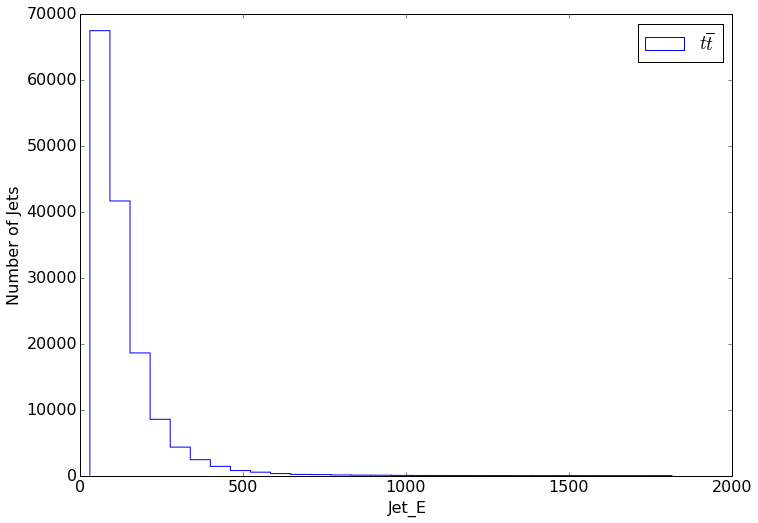

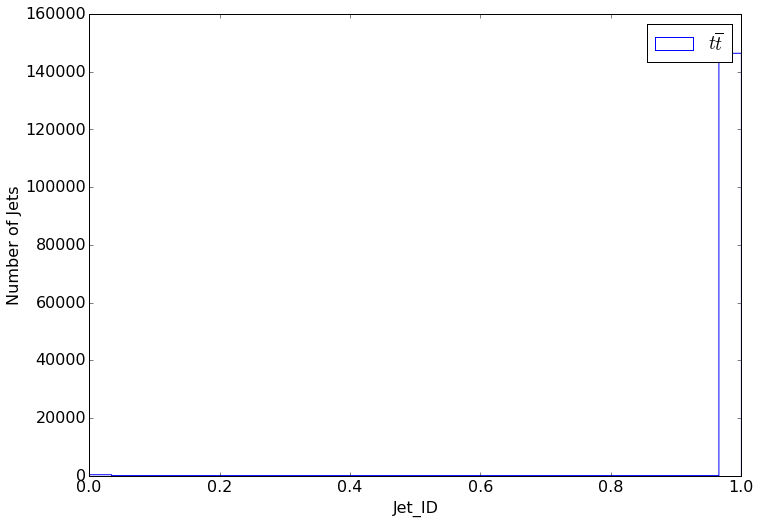

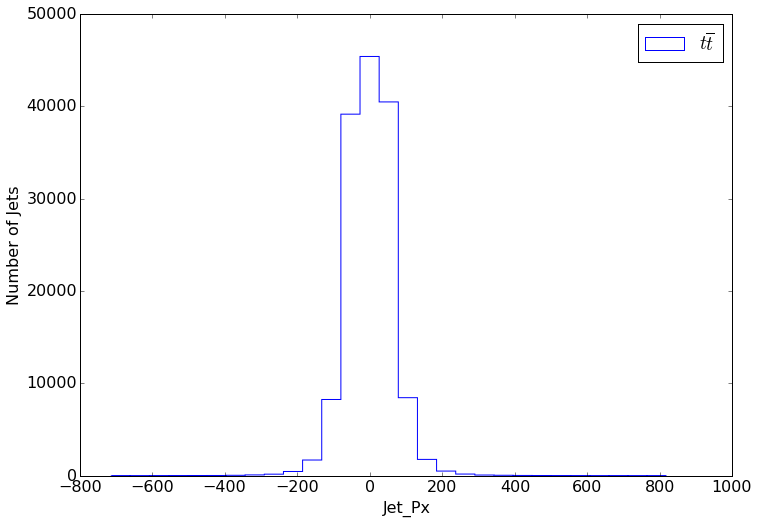

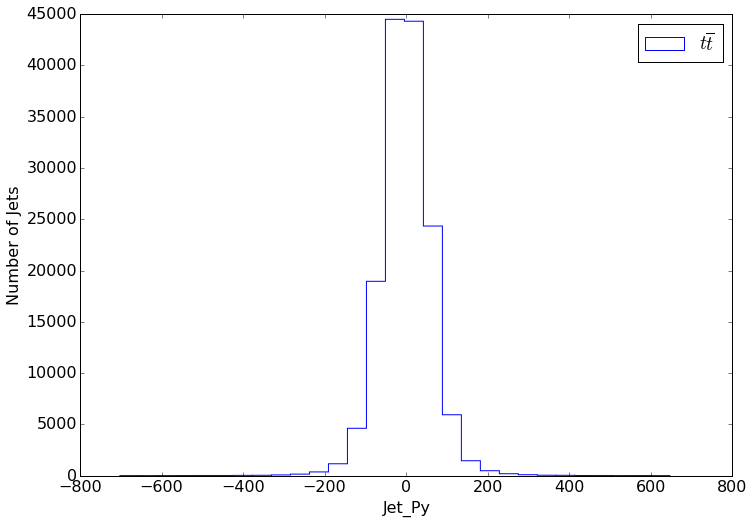

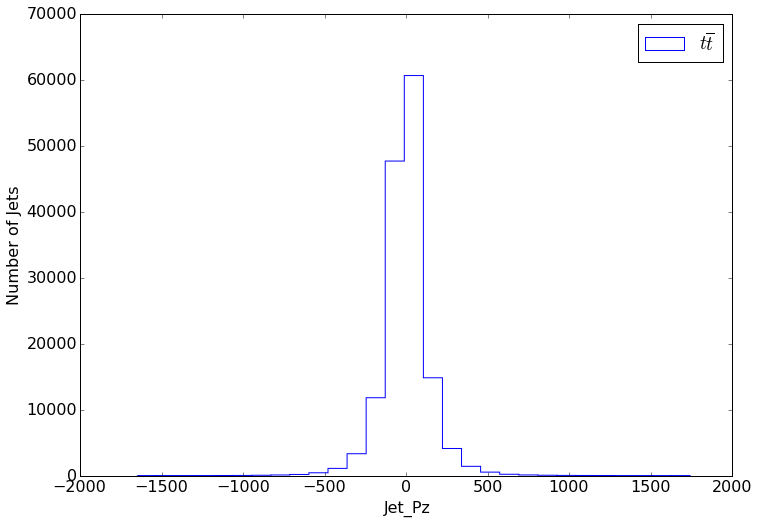

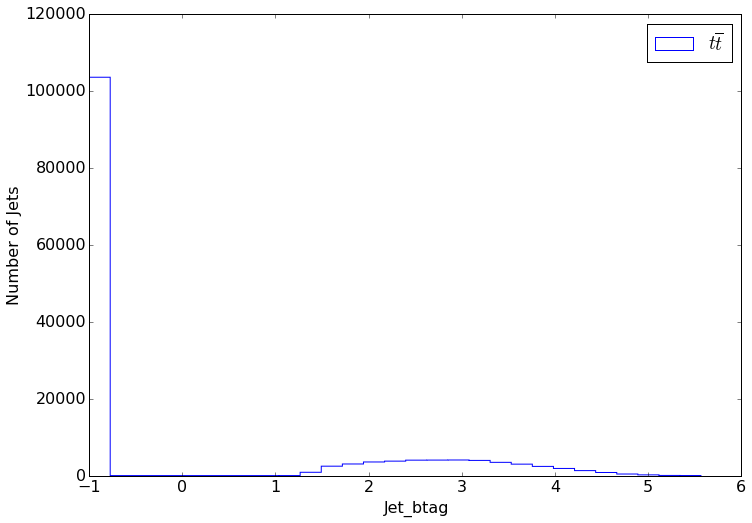

In [41]:
for key in df_flat.keys():
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(11.69, 8.27), dpi=100)
    bins = np.linspace(min(df_flat[key]), max(df_flat[key]), 30)
    _ = plt.hist(df_flat[key], bins=bins, histtype='step', label=r'$t\overline{t}$')
    plt.xlabel(key)
    plt.ylabel('Number of Jets')
    plt.legend()
    plt.plot()

It's really easy and intuitive to add new columns to a dataframe. You can also define them as functions of other columns. This is great if you need to build your own hand-crafted variables.

In [52]:
df['Jet_P'] = (df['Jet_Px']**2 + df['Jet_Py']**2 + df['Jet_Pz']**2)**(0.5)

In [81]:
# -- again, you can easily slice dataframes by specifying the names of the branches you would like to select 
df[['Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E']]

,Jet_Px,Jet_Py,Jet_Pz,Jet_E
0,"[14.5363, -22.5988, 47.9446]","[81.2174, -57.1286, -11.3546]","[69.8893, 214.74, 103.365]","[109.21, 223.634, 114.651]"
1,"[28.4418, -56.9156, 33.1661, -56.3586, 44.6846...","[-77.4063, 27.355, 53.6579, 26.6355, -14.1429,...","[-249.801, -83.3849, -35.8116, 32.7957, 17.631...","[263.247, 105.526, 72.9987, 71.0442, 51.121, 4..."
2,"[-16.0014, -41.8073, 29.1941, 38.4706]","[-59.6659, 21.0932, -28.6743, 7.80847]","[-49.9657, -29.6283, 38.0217, -14.9639]","[79.9953, 56.0485, 56.2464, 42.5101]"
3,"[-40.8037, 37.5208]","[34.4222, -35.3076]","[-47.5731, -67.0822]","[72.2569, 85.3261]"
4,"[-67.6013, 70.1426, 27.3418]","[83.3236, -71.9012, 50.1827]","[78.5999, -8.07146, 22.9956]","[135.263, 101.793, 62.2964]"
5,"[60.1636, 19.2109, -53.1219, -35.8345, -36.7036]","[-48.1469, 55.5747, 15.1115, -22.4722, -20.2822]","[-79.4751, 17.2434, -89.6975, -52.0183, -213.603]","[111.505, 62.7204, 105.851, 67.7739, 217.776]"
6,"[107.391, -80.5107, -8.28497, 19.3252]","[148.654, 4.38562, 30.2449, -23.9918]","[220.367, 227.749, 3.88503, 10.4075]","[288.185, 241.69, 32.3245, 33.761]"
7,"[-39.2862, 49.3453, -7.69329]","[-32.3978, 5.15671, 41.4265]","[-65.3803, -95.7182, -70.6679]","[83.5105, 108.047, 82.8404]"
8,"[25.6221, -12.1216, 104.58, -81.5174, -51.0835...","[234.388, -161.954, 26.0002, 43.2969, -55.2103...","[-112.61, 65.6851, 128.855, -45.9277, 152.302,...","[264.46, 179.259, 168.8, 104.616, 170.486, 71...."
9,"[-30.5867, 61.9777, 37.9987]","[65.4178, 17.8048, -0.186834]","[-31.2904, -55.3871, -85.5004]","[79.0765, 85.4173, 93.8284]"


In [93]:
# -- you can also build four vectors and store them in a new column in 1 line of code 
from rootpy.vector import LorentzVector
df['Jet_4V'] = [map(lambda args: LorentzVector(*args), zip(px, py, pz, e)) for 
                (_, (px, py, pz, e)) in df[['Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E']].iterrows()]

There is obviously lots you can do with your data once you turn it into a standard Python object and move away from `ROOT`-specific classes. You can now take advantage of state-of-the-art Data Science and Machine Learning libraries to transform your data.